In [1]:
%matplotlib inline

import datacube
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.insert(1, '../tools/')

from tools.datahandling import load_ard, mostcommon_crs
from tools.plotting import rgb
from tools.bandindices import calculate_indices
from odc.ui import with_ui_cbk

In [2]:
dc = datacube.Datacube(app='Sentinel-2')

In [3]:
lat, lon = 30.5, 31.7
buffer = 0.125

# Create a reusable query
query = {
    'x': (lon-buffer, lon+buffer),
    'y': (lat+buffer, lat-buffer),
    'time': ('2022-01-01', '2022-01-31'),
    'resolution': (-30, 30)
}

# Identify the most common projection system in the input query
output_crs = mostcommon_crs(dc=dc, product='s2_l2a', query=query)

# Load available data from Sentinel-2 and filter to retain only times
# with at least 90% good data
ds = load_ard(dc=dc, 
              products=['s2_l2a'],
              min_gooddata=0.95, 
              measurements=['red', 'green', 'blue', 'red_edge_1', 'red_edge_2', 'red_edge_3', 'nir'],
              output_crs=output_crs,
              progress_cbk=with_ui_cbk(),
              **query)

Using pixel quality parameters for Sentinel 2
Finding datasets
    s2_l2a
Counting good quality pixels for each time step
Filtering to 3 out of 6 time steps with at least 95.0% good quality pixels
Applying pixel quality/cloud mask
Loading 3 time steps


In [4]:
print(ds)

<xarray.Dataset>
Dimensions:      (time: 3, y: 934, x: 811)
Coordinates:
  * time         (time) datetime64[ns] 2022-01-03T08:41:48 ... 2022-01-18T08:...
  * y            (y) float64 3.389e+06 3.389e+06 ... 3.361e+06 3.361e+06
  * x            (x) float64 3.631e+05 3.631e+05 ... 3.873e+05 3.874e+05
    spatial_ref  int32 32636
Data variables:
    red          (time, y, x) float32 286.0 401.0 355.0 ... 2.085e+03 2.574e+03
    green        (time, y, x) float32 823.0 777.0 810.0 ... 1.571e+03 1.881e+03
    blue         (time, y, x) float32 403.0 425.0 407.0 ... 469.0 903.0 970.0
    red_edge_1   (time, y, x) float32 1.316e+03 1.163e+03 ... 2.715e+03
    red_edge_2   (time, y, x) float32 4.806e+03 3.641e+03 ... 2.805e+03
    red_edge_3   (time, y, x) float32 5.699e+03 4.345e+03 ... 3.07e+03 2.955e+03
    nir          (time, y, x) float32 5.526e+03 4.296e+03 ... 3.173e+03
Attributes:
    crs:           epsg:32636
    grid_mapping:  spatial_ref


/usr/local/lib/python3.8/dist-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


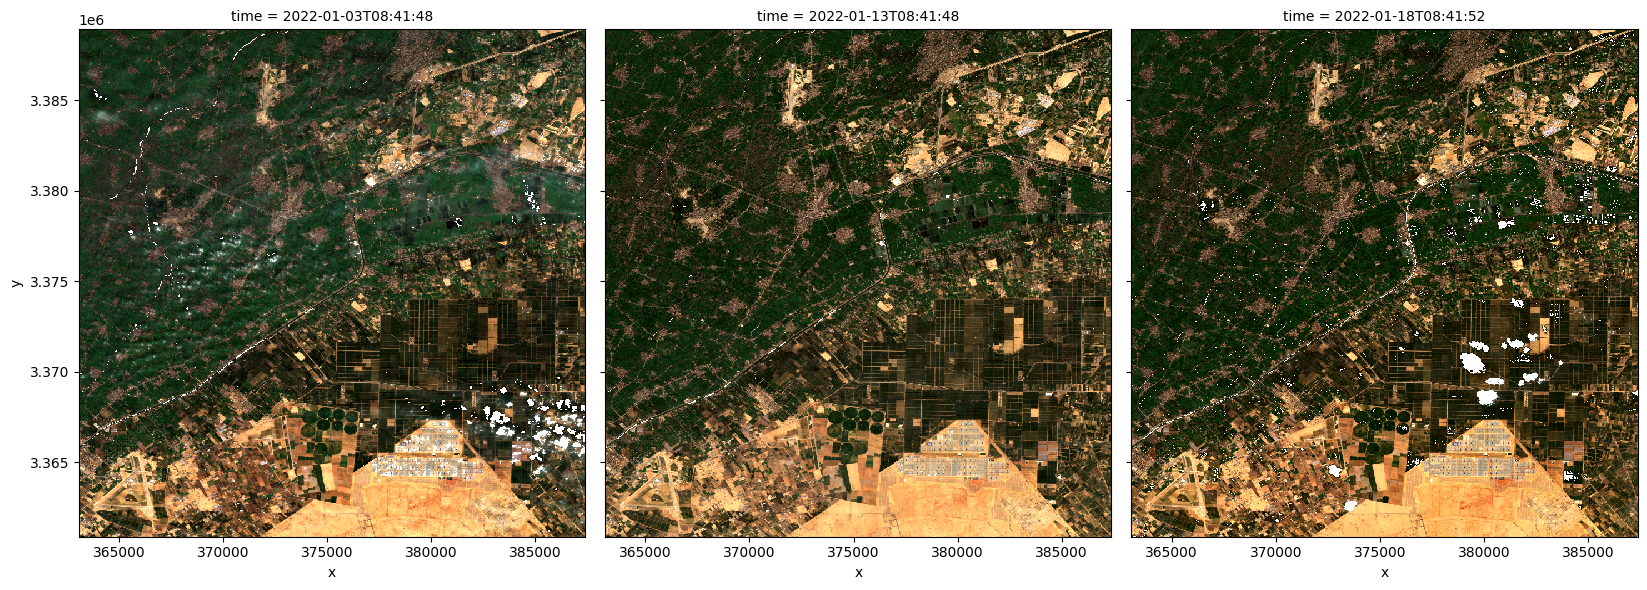

In [5]:
# Plot as an RGB image
rgb(ds, col='time')

In [6]:
# Calculate multiple indices
ds = calculate_indices(ds, index=['NDVI', 'NDCI', 'IRECI', 'MTCI', 'OTCI', 'MCARI'
                                       , 'CI_RedEdge', 'CI_GreenEdge', 'TCARI', 'OSAVI', 'TCARI_OSAVI']
                            , drop=True, satellite_mission='s2')

print(ds)

Dropping bands ['red', 'green', 'blue', 'red_edge_1', 'red_edge_2', 'red_edge_3', 'nir']
<xarray.Dataset>
Dimensions:       (time: 3, y: 934, x: 811)
Coordinates:
  * time          (time) datetime64[ns] 2022-01-03T08:41:48 ... 2022-01-18T08...
  * y             (y) float64 3.389e+06 3.389e+06 ... 3.361e+06 3.361e+06
  * x             (x) float64 3.631e+05 3.631e+05 ... 3.873e+05 3.874e+05
    spatial_ref   int32 32636
Data variables:
    NDVI          (time, y, x) float32 0.9016 0.8293 0.8677 ... 0.1844 0.1042
    NDCI          (time, y, x) float32 0.6429 0.4872 0.5526 ... 0.06439 0.02666
    IRECI         (time, y, x) float32 1.977 1.235 1.37 ... 0.2906 0.112 0.03936
    MTCI          (time, y, x) float32 3.388 3.252 3.09 ... 2.395 1.132 0.6383
    OTCI          (time, y, x) float32 6.777 6.504 6.18 ... 4.79 2.265 1.277
    MCARI         (time, y, x) float32 0.1009 0.07354 ... 0.01462 -0.001714
    CI_RedEdge    (time, y, x) float32 3.331 2.736 2.765 ... 0.2943 0.0884
    CI_GreenEdge

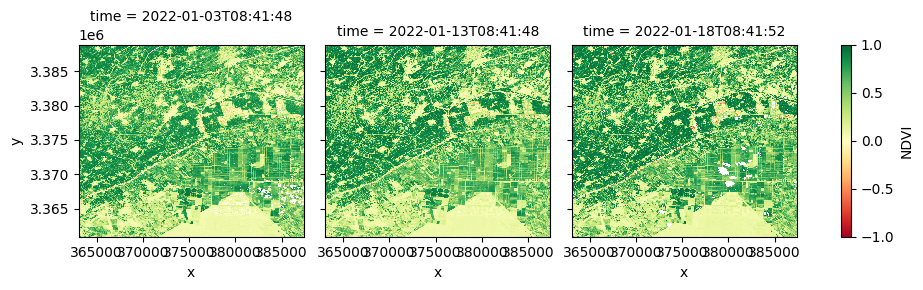

In [7]:
# Plot the NDVI results 
ds.NDVI.plot(col='time',vmin=-1, vmax=1, robust=True, cmap='RdYlGn',  col_wrap=3)

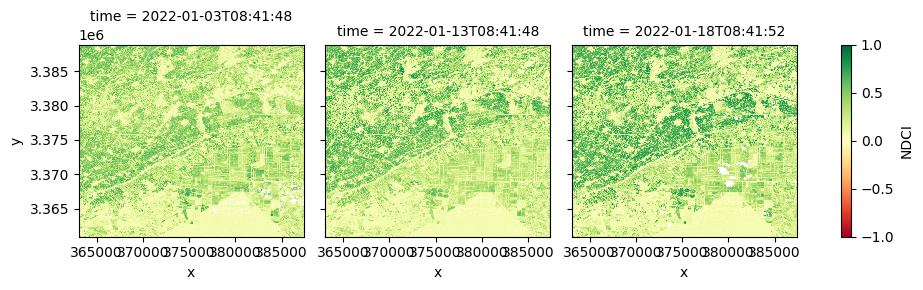

In [8]:
# Plot the NDCI results 
ds.NDCI.plot(col='time',vmin=-1, vmax=1, robust=True, cmap='RdYlGn', col_wrap=3)

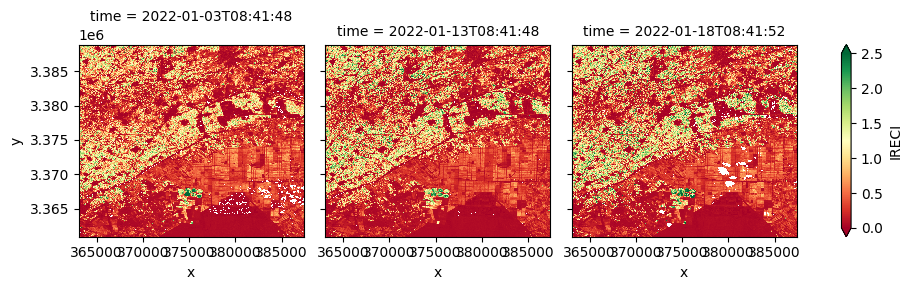

In [9]:
# Plot the IRECI results 
ds.IRECI.plot(col='time', vmin=0, vmax=2.5,robust=True, cmap='RdYlGn', col_wrap=3)

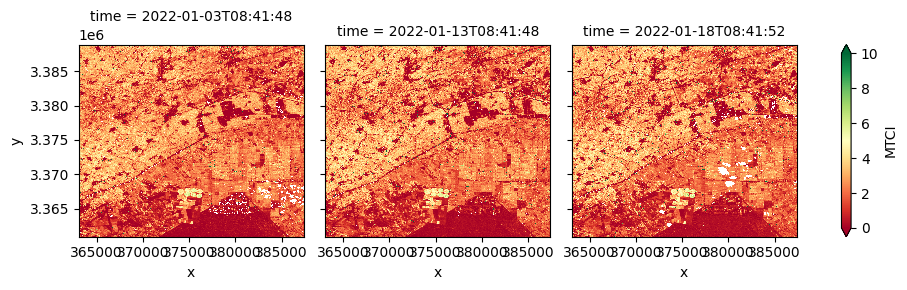

In [10]:
# Plot the MTCI results 
ds.MTCI.plot(col='time',vmin=0, vmax=10, robust=True, cmap='RdYlGn', col_wrap=3)

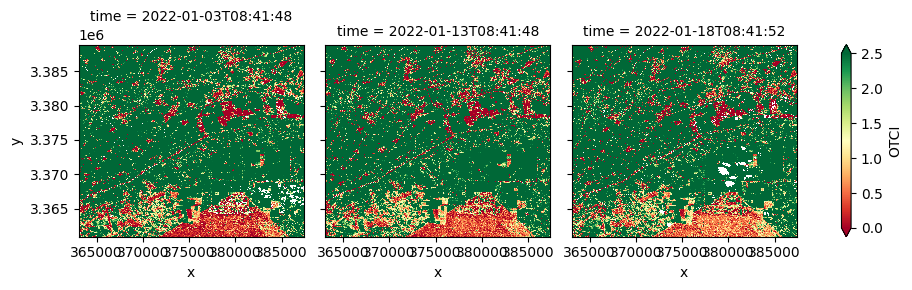

In [11]:
# Plot the OTCI results 
ds.OTCI.plot(col='time',vmin=0, vmax=2.5, robust=True, cmap='RdYlGn', col_wrap=3)

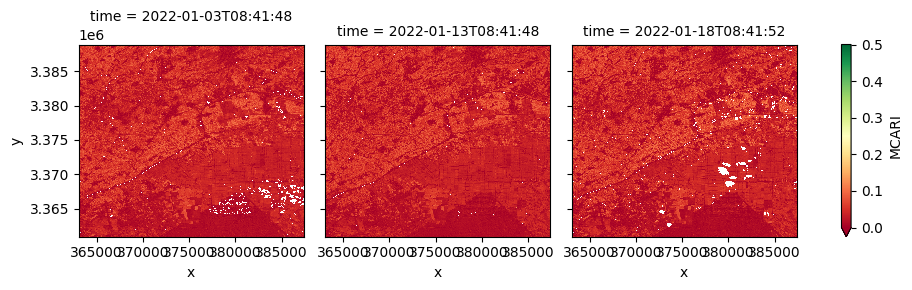

In [12]:
# Plot the MCARI results 
ds.MCARI.plot(col='time',vmin=0, vmax=0.5, robust=True, cmap='RdYlGn', col_wrap=3)

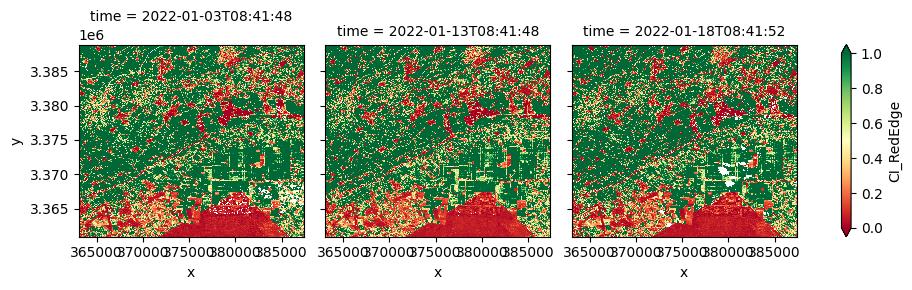

In [13]:
# Plot the CI-RedEdge results 
ds.CI_RedEdge.plot(col='time',vmin=0, vmax=1, robust=True, cmap='RdYlGn', col_wrap=3)

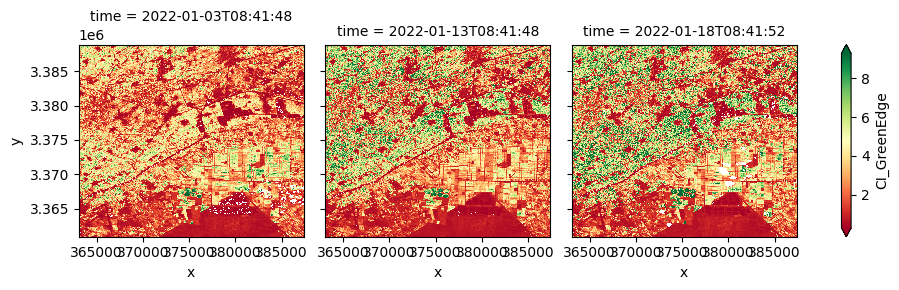

In [14]:
# Plot the CI-GreenEdge results 
ds.CI_GreenEdge.plot(col='time', robust=True, cmap='RdYlGn', col_wrap=3)

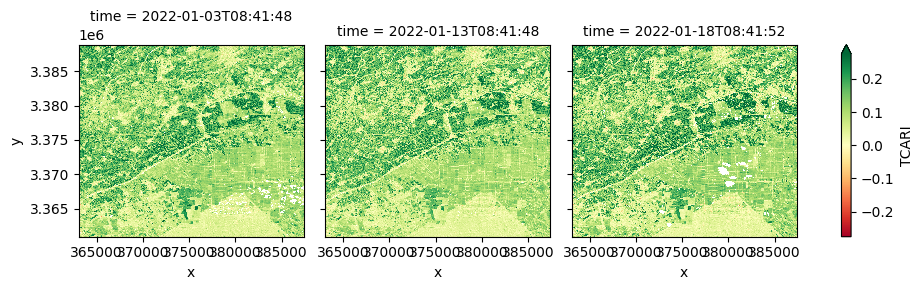

In [15]:
# Plot the TCARI results 
ds.TCARI.plot(col='time', robust=True, cmap='RdYlGn', col_wrap=3)

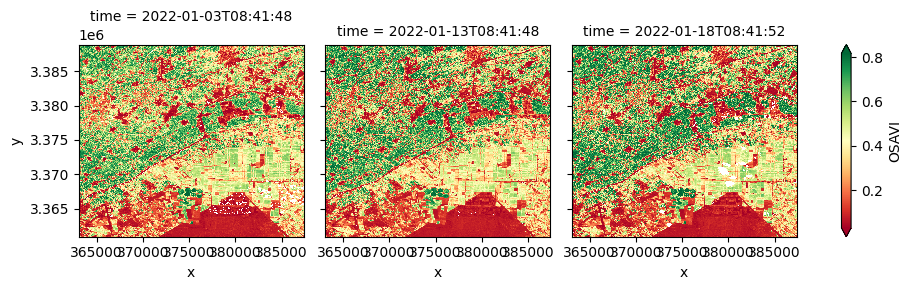

In [16]:
# Plot the OSAVI results 
ds.OSAVI.plot(col='time', robust=True, cmap='RdYlGn', col_wrap=3)

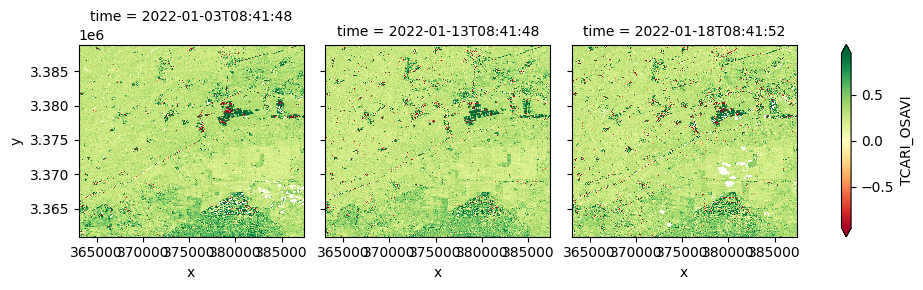

In [17]:
# Plot the TCARI_OSAVI results 
ds.TCARI_OSAVI.plot(col='time', robust=True, cmap='RdYlGn', col_wrap=3)